# Machine Learning for Anomaly Detection

In [ ]:
import numpy as np
import pandas as pd
random_seed = np.random.RandomState(12)

In [ ]:
# generate set of normal observation to be used as training data
x_train = 0.5*random_seed.randn(500,2)
x_train= np.r_[x_train+3, x_train]
x_train=pd.DataFrame(x_train, columns = ["x","y"])

In [ ]:
# generate a testing set, that consist normal observation
x_test = 0.5*random_seed.randn(500,2)
x_test= np.r_[x_test+3, x_test]
x_test=pd.DataFrame(x_test, columns = ["x","y"])


In [ ]:
# generate a set of outlier observation.they are generated from a different distribution the the normal distrib
x_outliers= random_seed.uniform(low=-5, high=5, size=(50,2))
x_outliers= pd.DataFrame(x_outliers, columns = ["x","y"])

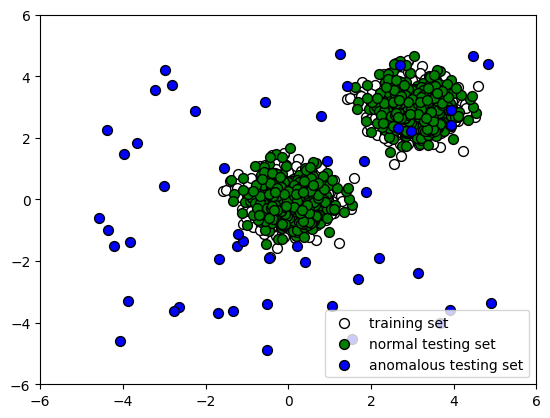

In [ ]:
#our generated data
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(x_train.x, x_train.y, c ="white",s=50, edgecolor="black")
p2 = plt.scatter(x_test.x, x_test.y, c ="green",s=50, edgecolor="black")
p3 = plt.scatter(x_outliers.x, x_outliers.y, c ="blue",s=50, edgecolor="black")

plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(
    [p1,p2,p3],
    ["training set", "normal testing set", "anomalous testing set"],
    loc = "lower right",

)
plt.show()



In [ ]:
#train Isolation Forest model in training data
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
clf.fit(x_train)
y_pred_train= clf.predict(x_train)
y_pred_test= clf.predict(x_test)
y_pred_outliers= clf.predict(x_outliers)

In [ ]:
#algorithm performs. append the labels to x_outliers
x_outliers=x_outliers.assign(pred=y_pred_outliers)
x_outliers.head()

,x,y,pred
0,3.947504,2.891003,-1
1,0.413976,-2.025841,-1
2,-2.644476,-3.480783,-1
3,-0.518212,-3.386443,-1
4,2.977669,2.215355,1


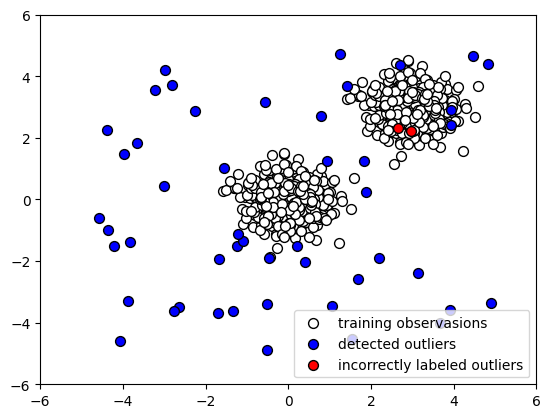

In [ ]:
# plot the isolation Forest predictions on the outliters to see how many it caught
p1 = plt.scatter(x_train.x, x_train.y, c ="white",s=50, edgecolor="black")
p2 = plt.scatter(
    x_outliers.loc[x_outliers.pred ==-1, ["x"]],
    x_outliers.loc[x_outliers.pred ==-1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    x_outliers.loc[x_outliers.pred == 1, ["x"]],
    x_outliers.loc[x_outliers.pred == 1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)


plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(
    [p1,p2,p3],
    ["training observasions", "detected outliers", "incorrectly labeled outliers"],
    loc = "lower right",

)
plt.show()


In [ ]:
#perform on the normal testing data. append the predicted label to x_test
x_test =x_test.assign(pred=y_pred_test)
x_test.head()

,x,y,pred
0,3.944575,3.866919,-1
1,2.984853,3.142150,1
2,3.501735,2.168262,-1
3,2.906300,3.233826,1
4,3.273225,3.261790,1


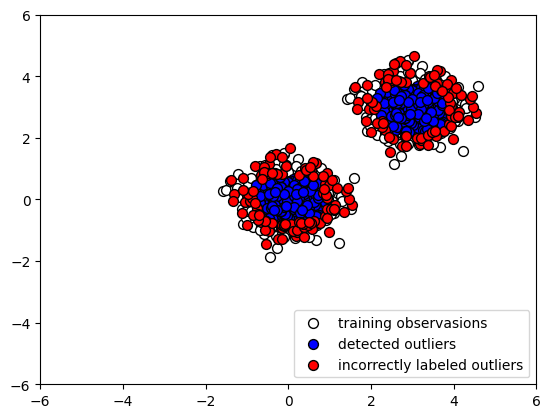

In [ ]:
#lets plot results to see whether our classifier labeled the normal testing data correctly
p1 = plt.scatter(x_train.x, x_train.y, c ="white",s=50, edgecolor="black")
p2 = plt.scatter(
    x_test.loc[x_test.pred ==1, ["x"]],
    x_test.loc[x_test.pred ==1, ["y"]],
    c="blue",
    s=50,
    edgecolor="black"
)
p3 = plt.scatter(
    x_test.loc[x_test.pred == -1, ["x"]],
    x_test.loc[x_test.pred == -1, ["y"]],
    c="red",
    s=50,
    edgecolor="black"
)


plt.xlim((-6,6))
plt.ylim((-6,6))
plt.legend(
    [p1,p2,p3],
    ["training observasions",
     "detected outliers",
     "incorrectly labeled outliers"],
    loc = "lower right",

)
plt.show()


In [ ]:
def calculate_accuracy(y_true, y_pred):
  return (y_true == y_pred).sum() / len(y_true)

true_outlier_labels = np.array([-1] *50)

accuracy = calculate_accuracy(true_outlier_labels, y_pred_outliers)
print(f"Accuracy of outlier detection: {accuracy}")

Accuracy of outlier detection: 0.96
